# Context

Concrete is the most used material for construction in the world! There are some components that should be combined to make the concrete. These components can affect the compressive strength of the concrete. To obtain the real compressive strength of concrete (target labels in the dataset), an engineer needs to break the cylinder samples under the compression-testing machine. The failure load is divided by the cylinder's cross-section to obtain the compressive strength. Engineers use different kinds of concretes for different building purposes. For example, the strength of concrete used for residential buildings should not be lower than 2500 psi (17.2 MPa). Concrete is a material with high strength in compression, but low strength in tension. That is why engineers use reinforced concrete (usually with steel rebars) to build structures.

The raw dataset has columns labeled as:

* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* Age -- quantitative -- Day (1~365) -- Input Variable
* Concrete compressive strength -- quantitative -- MPa -- Output Variable

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
sns.set_style("white")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Functions

In [3]:
def iqr(data, column):
    Q1 = data[column].quantile(q = 0.25)
    Q3 = data[column].quantile(q = 0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3rd Quartile (Q3) is: ', Q3)
    print('Interqualile range (IQR) is: ', stats.iqr(data[column]))
    return None

In [4]:
# outlier detection from IQR range
def outlier_detection(data, column):
    Q1 = data[column].quantile(q = 0.25)
    Q3 = data[column].quantile(q = 0.75)

    L_outliers = Q1 - 1.5 * (Q3 - Q1)
    U_outliers = Q3 + 1.5 * (Q3 - Q1)

    print(f'Lower outliers limit in {column}: ', L_outliers)
    print(f'Upper outliers limit in {column}: ', U_outliers)
    return None

In [5]:
# checking for the presence of outliers with upper and lower limits
def num_outliers(data, column):

    Q1 = data[column].quantile(q = 0.25)
    Q3 = data[column].quantile(q = 0.75)

    L_outliers = Q1 - 1.5 * (Q3 - Q1)
    U_outliers = Q3 + 1.5 * (Q3 - Q1)

    number_upper = data[data[column] > U_outliers][column].count()
    number_lower = data[data[column] < L_outliers][column].count()

    percentage_number_upper = ((number_upper * 100) / len(data)).round(2)
    percentage_number_lower = ((number_lower * 100) / len(data)).round(2)

    print(f'Number of outliers in {column} upper: ', number_upper)
    print(f'Number of outliers in {column} lower: ', number_lower)

    print(f'% of oulier in {column} upper: ', percentage_number_upper, '%')
    print(f'% of oulier in {column} lower: ', percentage_number_lower, '%')
    return None

# Exploratory Data Analysis

In [6]:
df = pd.read_csv('Concrete_Data.csv')

In [7]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,"540,0","0,0","0,0","162,0","2,5","1040,0","676,0",28,"79,99"
1,"540,0","0,0","0,0","162,0","2,5","1055,0","676,0",28,"61,89"
2,"332,5","142,5","0,0","228,0","0,0","932,0","594,0",270,"40,27"
3,"332,5","142,5","0,0","228,0","0,0","932,0","594,0",365,"41,05"
4,"198,6","132,4","0,0","192,0","0,0","978,4","825,5",360,"44,30"


It's necessary to replace commas to dots first.

In [8]:
for column in df.columns:
    # convert all columns to string
    df[column] = df[column].astype(str)
    # replace commas to dots
    df[column] = df[column].str.replace(',', '.')

In [9]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In order for an easier manipulation, let's replace and short the column names.

In [10]:
df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)':'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
       'Water  (component 4)(kg in a m^3 mixture)':'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplastic',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarseagg',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg', 
       'Age (day)':'age',
       'Concrete compressive strength(MPa, megapascals) ':'strength'}, inplace = True)

In [11]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


There are 8 independent variabes and all the records are numeric.

In [12]:
df.dtypes

cement          object
slag            object
ash             object
water           object
superplastic    object
coarseagg       object
fineagg         object
age             object
strength        object
dtype: object

Let's convert the data types of each columns

In [13]:
for column in df.columns:
    df[column] = df[column].astype('float64')

In [14]:
df['age'] = df['age'].astype('int64')

In [15]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [16]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [17]:
df.shape

(1030, 9)

In [18]:
# checking for missing values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [19]:
# main statistics
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.17,104.51,102.00,192.38,272.90,350.00,540.0
slag,1030.0,73.90,86.28,0.00,0.00,22.00,142.95,359.4
ash,1030.0,54.19,64.00,0.00,0.00,0.00,118.30,200.1
water,1030.0,181.57,21.35,121.80,164.90,185.00,192.00,247.0
superplastic,1030.0,6.20,5.97,0.00,0.00,6.40,10.20,32.2
coarseagg,1030.0,972.92,77.75,801.00,932.00,968.00,1029.40,1145.0
fineagg,1030.0,773.58,80.18,594.00,730.95,779.50,824.00,992.6
age,1030.0,45.66,63.17,1.00,7.00,28.00,56.00,365.0
strength,1030.0,35.82,16.71,2.33,23.71,34.44,46.14,82.6


It's possible to see that cement, slag and ash are left sweked, let's investigate those features.

## Cement

In [20]:
# quartiles
iqr(data = df, column = 'cement')

1st Quartile (Q1) is:  192.375
3rd Quartile (Q3) is:  350.0
Interqualile range (IQR) is:  157.625


In [21]:
# outlier detection
outlier_detection(data = df, column = 'cement')

Lower outliers limit in cement:  -44.0625
Upper outliers limit in cement:  586.4375


In [22]:
num_outliers(data = df, column = 'cement')

Number of outliers in cement upper:  0
Number of outliers in cement lower:  0
% of oulier in cement upper:  0.0 %
% of oulier in cement lower:  0.0 %


There are no outliers in the cement distribuition. It can also be checked using the boxplot.

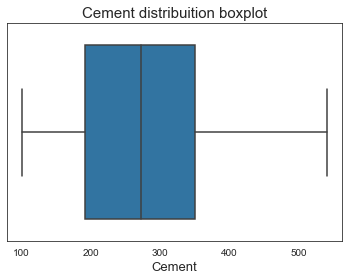

In [23]:
# distribuition of cement

ax = sns.boxplot(x = 'cement', 
                 data = df,
                 orient = 'h')
plt.title('Cement distribuition boxplot', fontsize = 15)
plt.xlabel('Cement', fontsize = 13)
ax = ax

We can see the distribuition for the other columns as well.

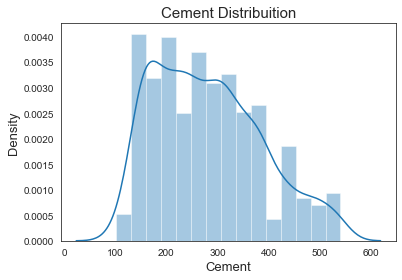

In [24]:
ax = sns.distplot(df['cement'])
plt.title('Cement Distribuition', fontsize = 15)
plt.xlabel('Cement', fontsize = 13)
plt.ylabel('Density', fontsize = 13)
ax = ax

## Water

In [25]:
# quartiles
iqr(data = df, column = 'water')

1st Quartile (Q1) is:  164.9
3rd Quartile (Q3) is:  192.0
Interqualile range (IQR) is:  27.099999999999994


In [26]:
# outlier detection
outlier_detection(data = df, column = 'water')

Lower outliers limit in water:  124.25000000000001
Upper outliers limit in water:  232.64999999999998


In [27]:
num_outliers(data = df, column = 'water')

Number of outliers in water upper:  4
Number of outliers in water lower:  5
% of oulier in water upper:  0.39 %
% of oulier in water lower:  0.49 %


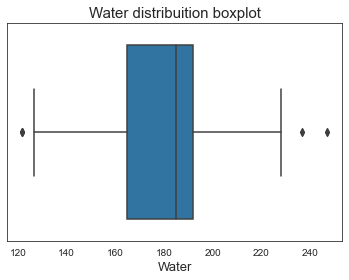

In [28]:
# distribuition of cement

ax = sns.boxplot(x = 'water', 
                 data = df,
                 orient = 'h')
plt.title('Water distribuition boxplot', fontsize = 15)
plt.xlabel('Water', fontsize = 13)
ax = ax

As we can see, there are outliers in the water column.

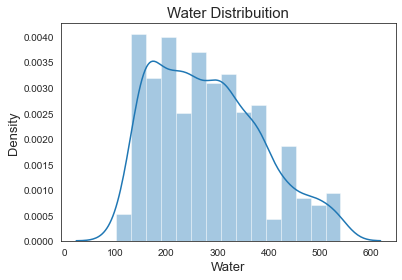

In [29]:
ax = sns.distplot(df['cement'])
plt.title('Water Distribuition', fontsize = 15)
plt.xlabel('Water', fontsize = 13)
plt.ylabel('Density', fontsize = 13)
ax = ax

## Slag

In [30]:
# quartiles
iqr(data = df, column = 'slag')

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  142.95
Interqualile range (IQR) is:  142.95


In [31]:
# outlier detection
outlier_detection(data = df, column = 'slag')

Lower outliers limit in slag:  -214.42499999999998
Upper outliers limit in slag:  357.375


In [32]:
num_outliers(data = df, column = 'slag')

Number of outliers in slag upper:  2
Number of outliers in slag lower:  0
% of oulier in slag upper:  0.19 %
% of oulier in slag lower:  0.0 %


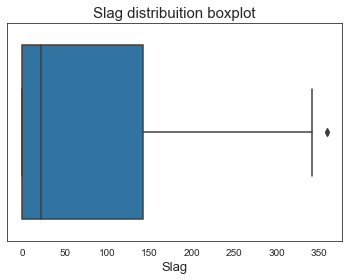

In [33]:
# distribuition of cement

ax = sns.boxplot(x = 'slag', 
                 data = df,
                 orient = 'h')
plt.title('Slag distribuition boxplot', fontsize = 15)
plt.xlabel('Slag', fontsize = 13)
ax = ax

As we can see, there are outliers in the slag column.

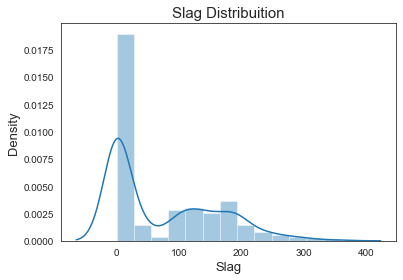

In [34]:
ax = sns.distplot(df['slag'])
plt.title('Slag Distribuition', fontsize = 15)
plt.xlabel('Slag', fontsize = 13)
plt.ylabel('Density', fontsize = 13)
ax = ax

## Age

In [35]:
# quartiles
iqr(data = df, column = 'age')

1st Quartile (Q1) is:  7.0
3rd Quartile (Q3) is:  56.0
Interqualile range (IQR) is:  49.0


In [36]:
# outlier detection
outlier_detection(data = df, column = 'age')

Lower outliers limit in age:  -66.5
Upper outliers limit in age:  129.5


In [37]:
num_outliers(data = df, column = 'age')

Number of outliers in age upper:  59
Number of outliers in age lower:  0
% of oulier in age upper:  5.73 %
% of oulier in age lower:  0.0 %


As we can see, there are may outliers above the upper limit.

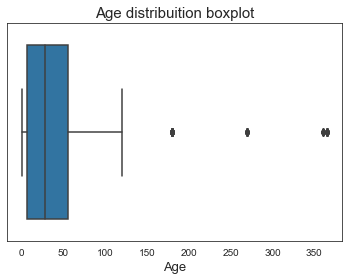

In [38]:
# distribuition of cement

ax = sns.boxplot(x = 'age', 
                 data = df,
                 orient = 'h')
plt.title('Age distribuition boxplot', fontsize = 15)
plt.xlabel('Age', fontsize = 13)
ax = ax

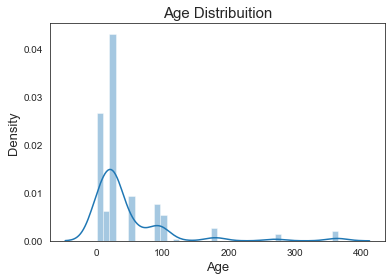

In [39]:
ax = sns.distplot(df['age'])
plt.title('Age Distribuition', fontsize = 15)
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Density', fontsize = 13)
ax = ax

## Ash

In [40]:
# quartiles
iqr(data = df, column = 'ash')

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  118.3
Interqualile range (IQR) is:  118.3


In [41]:
# outlier detection
outlier_detection(data = df, column = 'ash')

Lower outliers limit in ash:  -177.45
Upper outliers limit in ash:  295.75


In [42]:
num_outliers(data = df, column = 'ash')

Number of outliers in ash upper:  0
Number of outliers in ash lower:  0
% of oulier in ash upper:  0.0 %
% of oulier in ash lower:  0.0 %


There are no outliers in the ash column.

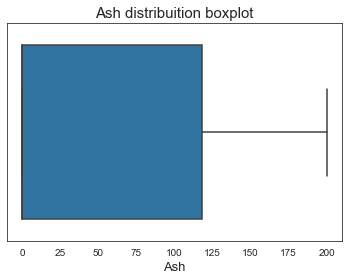

In [43]:
# distribuition of cement

ax = sns.boxplot(x = 'ash', 
                 data = df,
                 orient = 'h')
plt.title('Ash distribuition boxplot', fontsize = 15)
plt.xlabel('Ash', fontsize = 13)
ax = ax

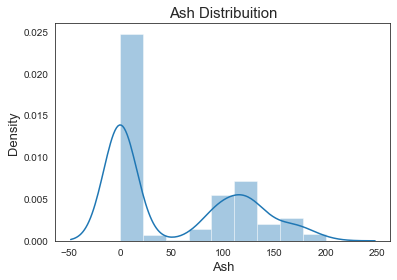

In [44]:
ax = sns.distplot(df['ash'])
plt.title('Ash Distribuition', fontsize = 15)
plt.xlabel('Ash', fontsize = 13)
plt.ylabel('Density', fontsize = 13)
ax = ax

## fineagg

In [45]:
# quartiles
iqr(data = df, column = 'fineagg')

1st Quartile (Q1) is:  730.95
3rd Quartile (Q3) is:  824.0
Interqualile range (IQR) is:  93.04999999999995


In [46]:
# outlier detection
outlier_detection(data = df, column = 'fineagg')

Lower outliers limit in fineagg:  591.3750000000001
Upper outliers limit in fineagg:  963.5749999999999


In [47]:
num_outliers(data = df, column = 'fineagg')

Number of outliers in fineagg upper:  5
Number of outliers in fineagg lower:  0
% of oulier in fineagg upper:  0.49 %
% of oulier in fineagg lower:  0.0 %


As we can see, there are outliers in the fineagg column.

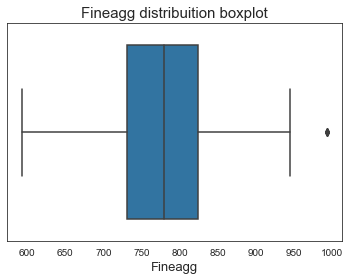

In [48]:
# distribuition of cement

ax = sns.boxplot(x = 'fineagg', 
                 data = df,
                 orient = 'h')
plt.title('Fineagg distribuition boxplot', fontsize = 15)
plt.xlabel('Fineagg', fontsize = 13)
ax = ax

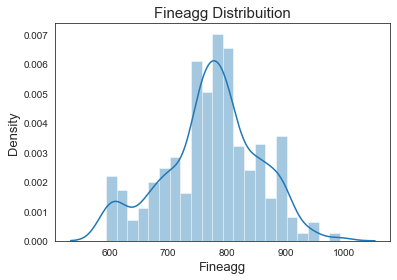

In [49]:
ax = sns.distplot(df['fineagg'])
plt.title('Fineagg Distribuition', fontsize = 15)
plt.xlabel('Fineagg', fontsize = 13)
plt.ylabel('Density', fontsize = 13)
ax = ax

## Superplastic

In [50]:
# quartiles
iqr(data = df, column = 'superplastic')

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  10.2
Interqualile range (IQR) is:  10.2


In [51]:
# outlier detection
outlier_detection(data = df, column = 'superplastic')

Lower outliers limit in superplastic:  -15.299999999999999
Upper outliers limit in superplastic:  25.5


In [52]:
num_outliers(data = df, column = 'superplastic')

Number of outliers in superplastic upper:  10
Number of outliers in superplastic lower:  0
% of oulier in superplastic upper:  0.97 %
% of oulier in superplastic lower:  0.0 %


As we ca see, there are outliers in the superplastic column.

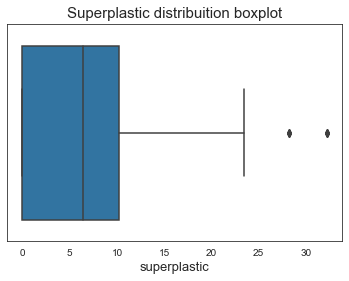

In [56]:
# distribuition of cement

ax = sns.boxplot(x = 'superplastic', 
                 data = df,
                 orient = 'h')
plt.title('Superplastic distribuition boxplot', fontsize = 15)
plt.xlabel('Superplastic', fontsize = 13)
ax = ax

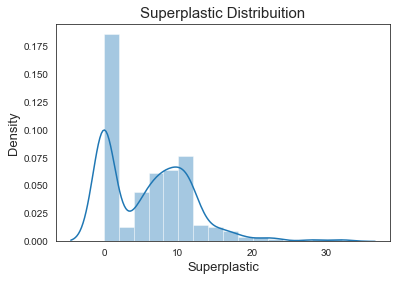

In [57]:
ax = sns.distplot(df['superplastic'])
plt.title('Superplastic Distribuition', fontsize = 15)
plt.xlabel('Superplastic', fontsize = 13)
plt.ylabel('Density', fontsize = 13)
ax = ax

## Coarseagg

In [53]:
# quartiles
iqr(data = df, column = 'coarseagg')

1st Quartile (Q1) is:  932.0
3rd Quartile (Q3) is:  1029.4
Interqualile range (IQR) is:  97.40000000000009


In [54]:
# outlier detection
outlier_detection(data = df, column = 'coarseagg')

Lower outliers limit in coarseagg:  785.8999999999999
Upper outliers limit in coarseagg:  1175.5000000000002


In [55]:
num_outliers(data = df, column = 'coarseagg')

Number of outliers in coarseagg upper:  0
Number of outliers in coarseagg lower:  0
% of oulier in coarseagg upper:  0.0 %
% of oulier in coarseagg lower:  0.0 %


As we can see, there are no outliers in coarseagg column.

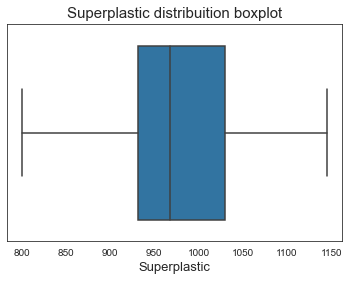

In [58]:
# distribuition of cement

ax = sns.boxplot(x = 'coarseagg', 
                 data = df,
                 orient = 'h')
plt.title('Coarseagg distribuition boxplot', fontsize = 15)
plt.xlabel('Coarseagg', fontsize = 13)
ax = ax

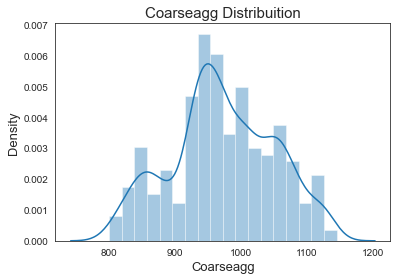

In [59]:
ax = sns.distplot(df['coarseagg'])
plt.title('Coarseagg Distribuition', fontsize = 15)
plt.xlabel('Coarseagg', fontsize = 13)
plt.ylabel('Density', fontsize = 13)
ax = ax

# Multivariate Analysis

Text(0.5, 1.0, 'Strength distribuition')

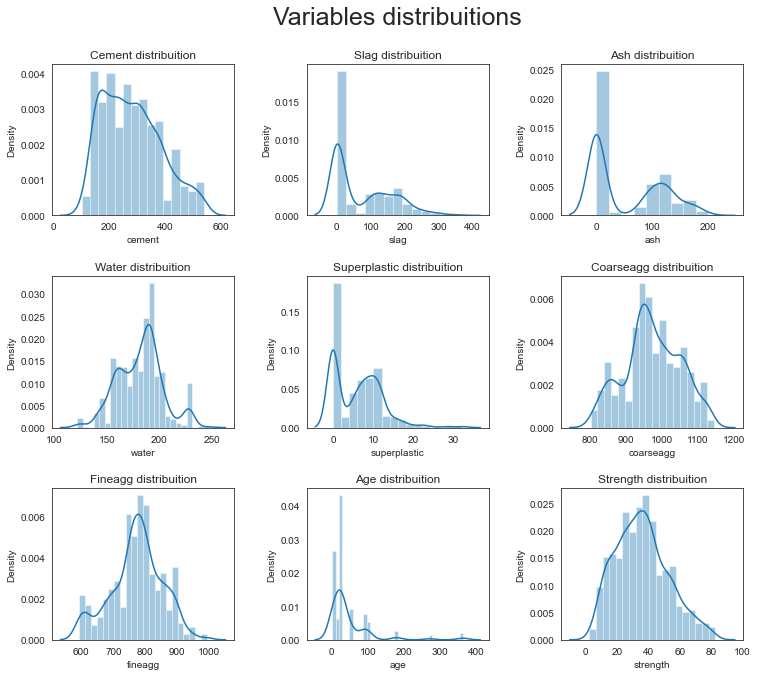

In [65]:
# distplot
fig, ax2 = plt.subplots(3, 3, figsize = (12, 10))
plt.subplots_adjust(left = 0.1,
                    bottom = 0.1, 
                    right = 0.9, 
                    top = 0.9, 
                    wspace = 0.4, 
                    hspace = 0.4)
fig.suptitle('Variables distribuitions', fontsize = 25)

sns.distplot(df['cement'], ax = ax2[0][0]).set_title('Cement distribuition') # cement
sns.distplot(df['slag'], ax = ax2[0][1]).set_title('Slag distribuition') # slag
sns.distplot(df['ash'], ax = ax2[0][2]).set_title('Ash distribuition') # ash
sns.distplot(df['water'], ax = ax2[1][0]).set_title('Water distribuition') # water
sns.distplot(df['superplastic'], ax = ax2[1][1]).set_title('Superplastic distribuition') # superplastic
sns.distplot(df['coarseagg'], ax = ax2[1][2]).set_title('Coarseagg distribuition') # coarseagg
sns.distplot(df['fineagg'], ax = ax2[2][0]).set_title('Fineagg distribuition') # fineagg
sns.distplot(df['age'], ax = ax2[2][1]).set_title('Age distribuition') # age
sns.distplot(df['strength'], ax = ax2[2][2]).set_title('Strength distribuition') # strength